<a href="https://colab.research.google.com/github/kevincoakley/DT8807/blob/main/perceptron_logic_gates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd

inputs = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])

w_and = np.array([1, 1])
b_and = -1.5

w_or = np.array([1, 1])
b_or = -0.5

w_nand = np.array([-1, -1])
b_nand = 1.5

w_nor = np.array([-1, -1])
b_nor = 0.5

w_not = -1
b_not = 0.5

# Define the activation function (step function)
def step_function(s):
  if s >= 0:
    return 1 
  else:
    return 0

# Define the perceptron
# x is a matix, weight is a vector, bias is a scalar
def perceptron(x, weight, bias):

  v = np.dot(x, weight) + bias
  
  # Apply step function
  y = step_function(v)
  return y
  

In [23]:
import matplotlib.pyplot as plt

def plot_gate(inputs, results, weight_1 = [], bias_1 = 0, weight_2 = [], bias_2 = 0):

  # Plot the 4 points, blue points = 0, red points = 1
  for idx, x in enumerate(inputs):
    if results[idx] == 1:
      plt.plot(x[0], x[1], marker="o", color="red", label='True')
    else:
      plt.plot(x[0], x[1], marker="x", color="blue", label='False')

  if bias_1 != 0:

    # find x min and x max 
    x1_min, x1_max = inputs[:,0].min() -1, inputs[:,0].max() + 1

    # create an array for the x axis from x_min to x_max for every .1 points
    xx1 = np.arange(x1_min, x1_max, .1) 

    # compute the y value for each x using y = mx + b
    xx2 = -weight_1[0]/weight_1[1] * xx1 - bias_1/weight_1[1]

    plt.plot(xx1, xx2, 'g--')

  if bias_2 != 0:

    # find x min and x max 
    x1_min, x1_max = inputs[:,0].min() -1, inputs[:,0].max() + 1

    # create an array for the x axis from x_min to x_max for every .1 points
    xx1 = np.arange(x1_min, x1_max, .1) 

    # compute the y value for each x using y = mx + b
    xx2 = -weight_2[0]/weight_2[1] * xx1 - bias_2/weight_2[1]

    plt.plot(xx1, xx2, 'g--')

  plt.grid()
  plt.legend(loc='upper left')
  plt.show()

x1,x2,AND
0,0,0
1,0,0
0,1,0
1,1,1


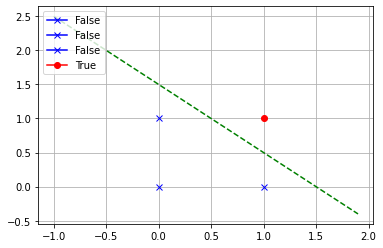

In [48]:
# Compute the AND vector
and_results = []

for x in inputs:
  and_results.append(perceptron(x, w_and, b_and))

# Display the results as a dataframe
df = pd.DataFrame(inputs, columns=["x1", "x2"])
df["AND"] = and_results
display(df.style.hide_index())

# Display the results as a plot
plot_gate(inputs, and_results, w_and, b_and)

x1,x2,OR
0,0,0
1,0,1
0,1,1
1,1,1


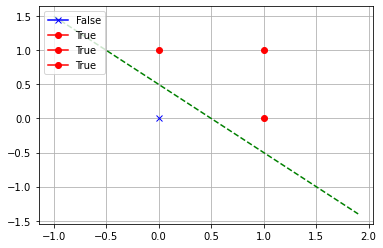

In [49]:
or_results = []

for x in inputs:
  or_results.append(perceptron(x, w_or, b_or))

# Display the results as a dataframe
df = pd.DataFrame(inputs, columns=["x1", "x2"])
df["OR"] = or_results
display(df.style.hide_index())

# Display the results as a plot
plot_gate(inputs, or_results, w_or, b_or)

x1,x2,NAND
0,0,1
1,0,1
0,1,1
1,1,0


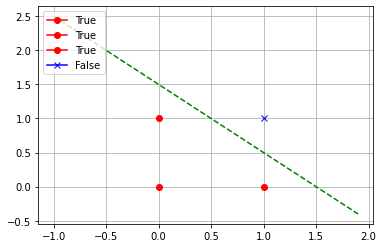

In [50]:
nand_results = []

for x in inputs:
  nand_results.append(perceptron(x, w_nand, b_nand))

# Display the results as a dataframe
df = pd.DataFrame(inputs, columns=["x1", "x2"])
df["NAND"] = nand_results
display(df.style.hide_index())

# Display the results as a plot
plot_gate(inputs, nand_results, w_nand, b_nand)

x1,x2,NOR
0,0,1
1,0,0
0,1,0
1,1,0


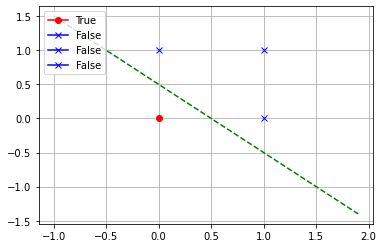

In [51]:
nor_results = []

for x in inputs:
  nor_results.append(perceptron(x, w_nor, b_nor))

# Display the results as a dataframe
df = pd.DataFrame(inputs, columns=["x1", "x2"])
df["NOR"] = nor_results
display(df.style.hide_index())

# Display the results as a plot
plot_gate(inputs, nor_results, w_nor, b_nor)

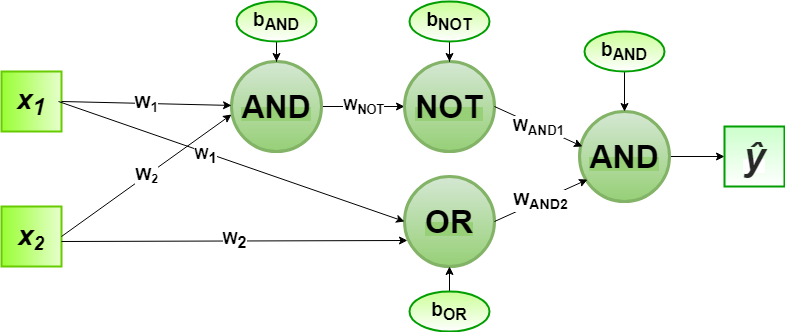

x1,x2,XOR
0,0,0
1,0,1
0,1,1
1,1,0


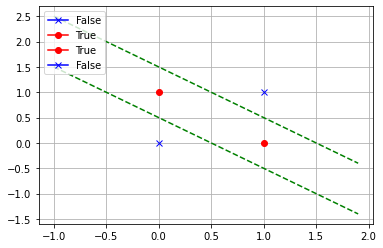

In [53]:
#
# Take the AND vector and apply the NOT perceptron 
#
and_not_results = []

for x in and_results:
  and_not_results.append(perceptron(x, w_not, b_not))

# Zip the AND_NOT vector and the OR vector to create new matrix input
and_not_zip_or_input = list(zip(and_not_results, or_results))

#
# Apply the AND perceptron to the new input matrix created from the AND_NOT vector and the OR vector
# to create the XOR result
#
xor_results = []

for x in and_not_zip_or_input:
  xor_results.append(perceptron(x, w_and, b_and))

# Display the results as a dataframe
df = pd.DataFrame(inputs, columns=["x1", "x2"])
df["XOR"] = xor_results
display(df.style.hide_index())

# Graph the gate using the OR weights/bias and the AND_NOT and weights/bias
plot_gate(inputs, xor_results, w_or, b_or, -w_and, -b_and)